In [ ]:
import torchvision
import numpy

from torchvision import datasets


In [ ]:
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=None)
test_data= datasets.MNIST(root='./data', train=False, download=True, transform=None)

print("Length of Training Data :", len(train_data))
print("Length of Testing Data :", len(test_data))

100%|██████████| 9912422/9912422 [00:00<00:00, 83631635.34it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 6867881.50it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26534776.21it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10848820.48it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Length of Training Data : 60000
Length of Testing Data : 10000


In [ ]:
mean = (train_data.data.float().mean()/255).numpy()
std = (train_data.data.float().std()/255).numpy()

print("The mean of the data is :", mean)
print("The STD of the data is :", std)



The mean of the data is : 0.13066047
The STD of the data is : 0.3081078


In [343]:
from torchvision import transforms

train_trans = transforms.Compose([transforms.RandomRotation(5), transforms.RandomCrop(size = 28, padding = 2), 
                                  transforms.ToTensor(), transforms.Normalize(mean = mean, std = std)])
test_trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean = [mean], std = [std])])

In [ ]:
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=train_trans)
test_data_fin= datasets.MNIST(root='./data', train=False, download=True, transform=test_trans)


print("Length of Training Data :", len(train_data))
print("Length of Testing Data :", len(test_data_fin))

Length of Training Data : 60000
Length of Testing Data : 10000


In [ ]:
import torch.utils.data as data
no_train = int(0.9*len(train_data))
no_val = int(0.1*len(train_data))

train_data_fin, val_data_fin = data.random_split(train_data, [no_train, no_val])

print("Length of Training Data :", len(train_data_fin))
print("Length of Validating Data :", len(val_data_fin))

Length of Training Data : 54000
Length of Validating Data : 6000


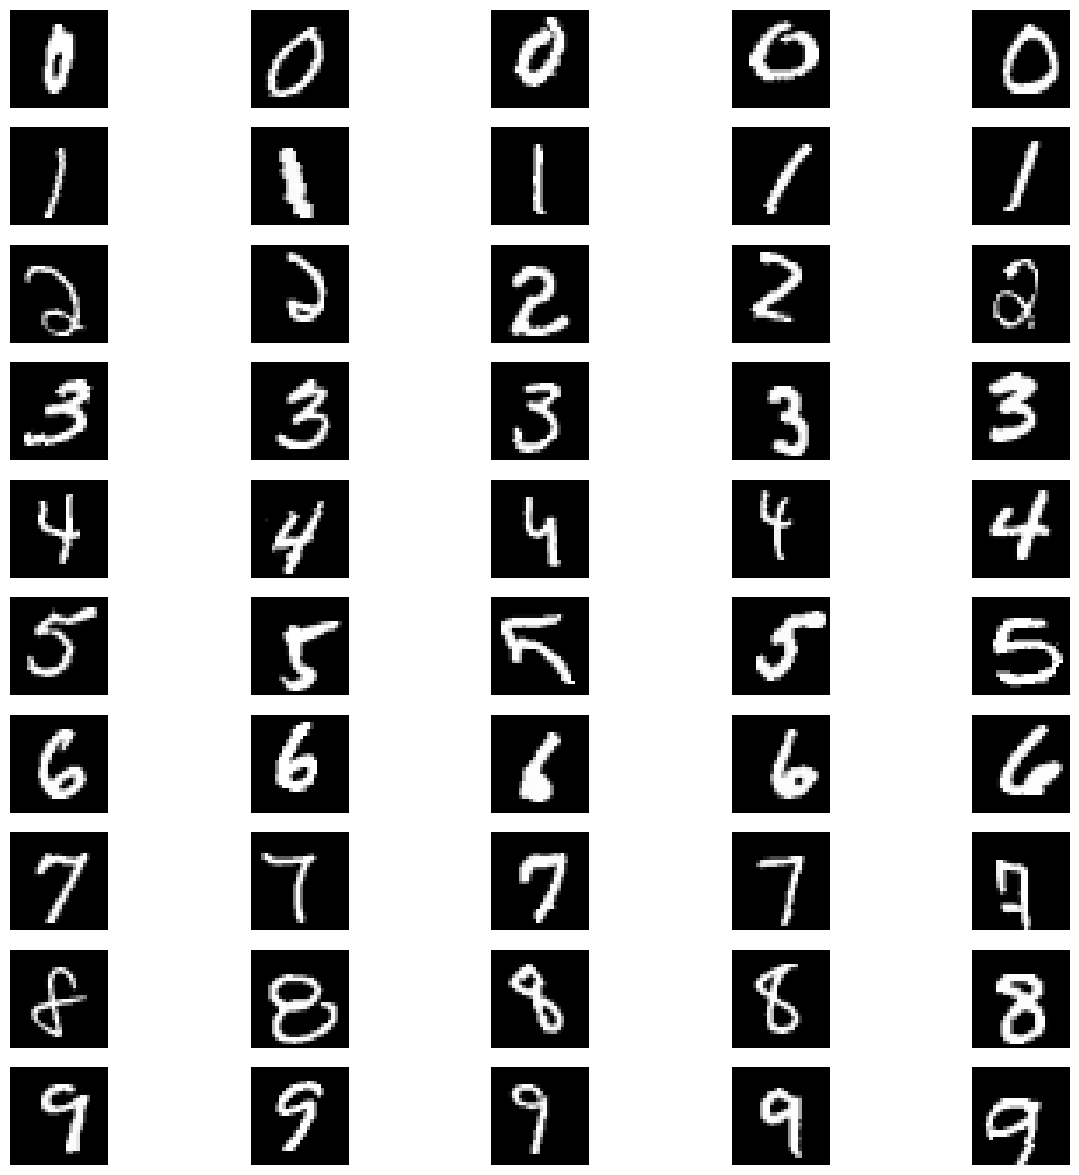

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision


class_images = [[] for i in range(10)]

for i, (image, label) in enumerate(train_data_fin):
    if len(class_images[label]) < 5:
        class_images[label].append(image)
    if all(len(images) == 5 for images in class_images):
        break

# Plot the images
fig, axs = plt.subplots(10, 5, figsize=(15, 15))
for i in range(10):
    for j in range(5):
        axs[i][j].imshow(np.squeeze(class_images[i][j]), cmap='gray')
        axs[i][j].axis('off')
plt.show()

In [ ]:
import torch

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data_fin, batch_size=64, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_data_fin, batch_size=64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data_fin, batch_size=64, shuffle = True)

In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

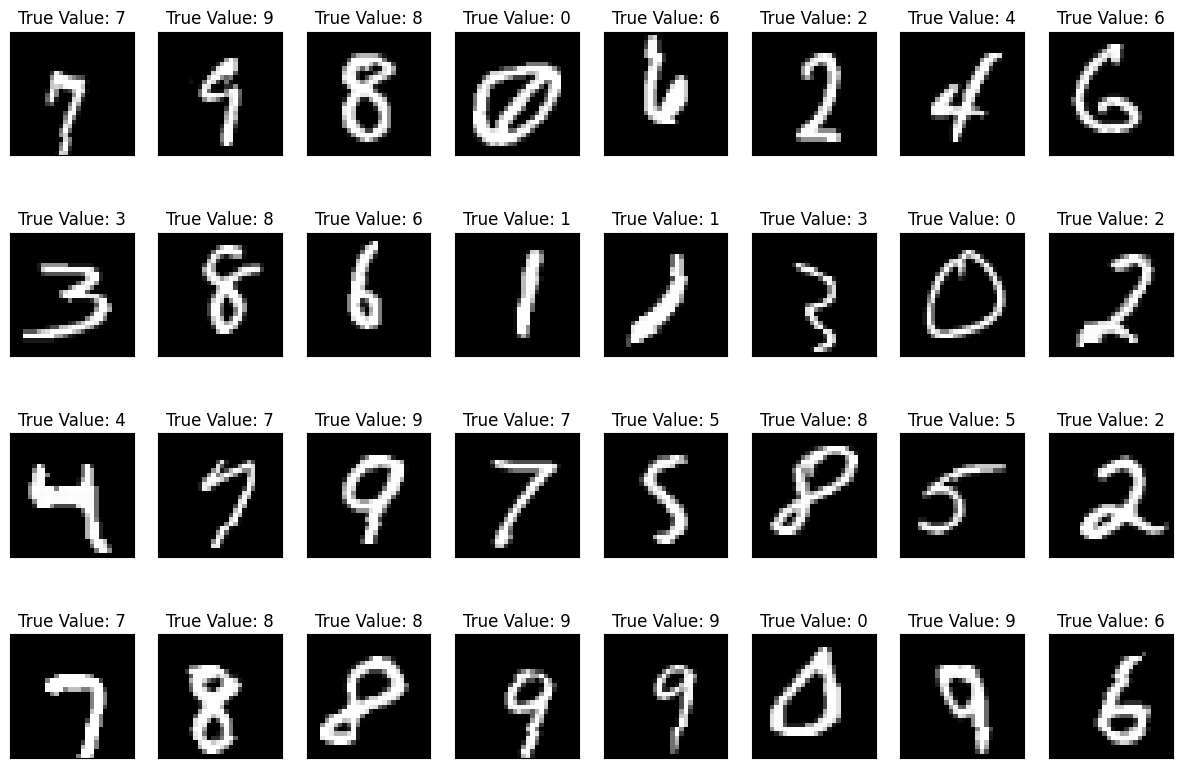

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 10))

for i in range(32):
  plt.subplot(4, 8,i+1)
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("True Value: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class MLP(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.input_fc = nn.Linear(input_dim, 250)
        self.hidden_fc = nn.Linear(250, 100)
        self.output_fc = nn.Linear(100, output_dim)
        

    def forward(self, X):
        batch_size = X.shape[0]
        X = X.view(batch_size, -1)

        h1 = torch.relu(self.input_fc(X))
        h2 = torch.relu(self.hidden_fc(X))
        
        Y_pred = self.output_fc(h2)
        return Y_pred, h2

In [ ]:
inp = 28*28
out = 10

model = MLP(inp, out)

In [ ]:
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Number of Trainanble Parameters :", count_params(model))

Number of Trainanble Parameters : 222360


In [ ]:
optimizer = torch.optim.Adam(model.parameters())

criteria = nn.CrossEntropyLoss()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criteria = criteria.to(device)
print("The device used is:", device)

The device used is: cpu


In [ ]:
def cal_acc(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float()/y.shape[0]
    return acc



In [ ]:
def train(model, iter, optimizer, criteria, device):
    epoch_loss = 0
    epoch_acc = 0

    for (x, y) in iter:
        x = x.to(device)

        y = y.to(device)

        Y_pred, _ = model(x)
        loss = criteria(Y_pred, y)

        acc = cal_acc(Y_pred, y)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        eopch_acc = acc.item()

    return epoch_loss/len(iter), epoch_acc/len(iter)


#**ANN From Scratch** 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/abalone.data', header = None)

print(data.shape)

(4177, 9)


###**Visualization and PreProcessing**


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
data.describe()

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<Axes: >

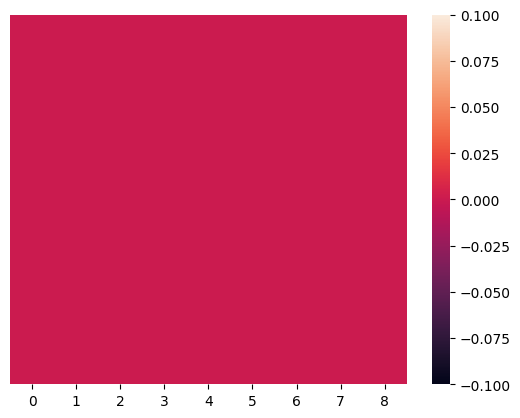

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False)

<Axes: >

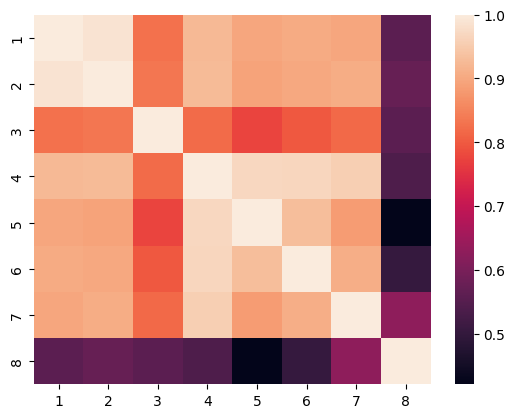

In [ ]:
sns.heatmap(data.corr())

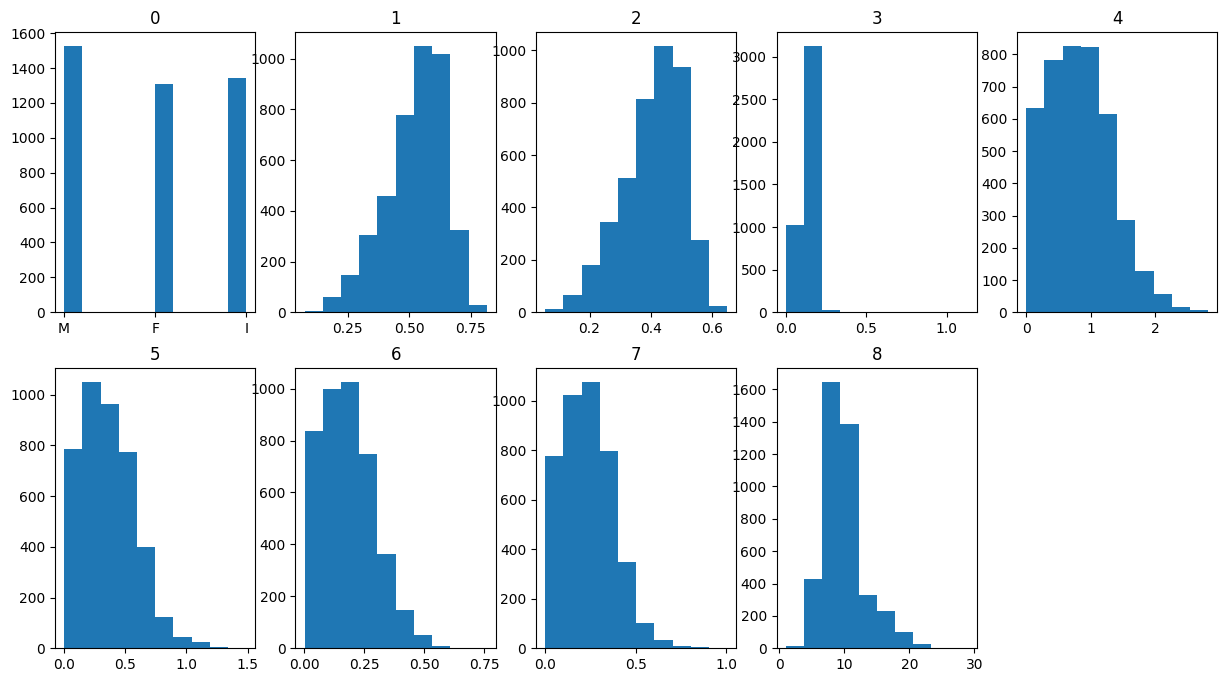

In [ ]:
import matplotlib.pyplot as plt

columns = list(data.columns)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.title(columns[i])
    plt.hist(data[columns[i]])

plt.show()

In [ ]:
Y = data.loc[:, 8]
X = data.drop(columns = [8]).copy()


X_temp = np.array(X[0])
X_temp[X_temp == 'M'] = 0.0
X_temp[X_temp == 'F'] = 1.0
X_temp[X_temp == 'I'] = 2.0

X[0] = X_temp

In [ ]:
X.head()

,0,1,2,3,4,5,6,7
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [ ]:
Y.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: 8, dtype: int64

In [ ]:
Y = np.array(Y)
X = np.array(X)

In [ ]:
columns = [27, 24, 1, 26, 29, 2 , 25]

for i in columns:
    while(np.count_nonzero(Y == i) < 3):
        X = np.append(X, [X[np.where(Y == i)][0]], axis = 0)
        Y = np.append(Y, [i], axis = 0)
        

In [ ]:
unique, counts = np.unique(Y, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  1   3]
 [  2   3]
 [  3  15]
 [  4  57]
 [  5 115]
 [  6 259]
 [  7 391]
 [  8 568]
 [  9 689]
 [ 10 634]
 [ 11 487]
 [ 12 267]
 [ 13 203]
 [ 14 126]
 [ 15 103]
 [ 16  67]
 [ 17  58]
 [ 18  42]
 [ 19  32]
 [ 20  26]
 [ 21  14]
 [ 22   6]
 [ 23   9]
 [ 24   3]
 [ 25   3]
 [ 26   3]
 [ 27   3]
 [ 29   3]]


In [336]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=0)

train_index = []
test_index = []
for x, y in sss.split(X, Y):
    train_index = x
    test_index = y

X_train = X[train_index]
Y_train = Y[train_index]
X_test = sc.fit_transform(X[test_index])
Y_test = Y[test_index]

sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.125, random_state=0)

train_index = []
val_index = []

for x, y in sss.split(X_train, Y_train):
    train_index = x
    val_index = y

X_train = sc.fit_transform(X[train_index])
Y_train = Y[train_index]
X_val = sc.fit_transform(X[val_index])
Y_val = Y[val_index]

X_train = sc.fit_transform(X_train)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)



(2680, 8)
(838, 8)
(671, 8)
(2680,)
(838,)
(671,)


###**Multi-Level Perceptron**

In [ ]:
import random

class MultiLayerPerceptron: 
    def __init__(self, params=None):     

        self.inputLayer = params['InputLayer']
        self.hiddenLayer = params['HiddenLayer']
        self.OutputLayer = params['OutputLayer']
        self.learningRate = params['LearningRate']
        self.max_epochs = params['Epocas']
        self.BiasHiddenValue = params['BiasHiddenValue']
        self.BiasOutputValue = params['BiasOutputValue']
        self.activation = self.ativacao[params['ActivationFunction']]
        self.deriv = self.derivada[params['ActivationFunction']]
        
        self.WEIGHT_hidden = params['hidden_wight']
        self.WEIGHT_output = params['output_wight']

        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = self.OutputLayer
        

    ativacao = { 'sigmoid': (lambda x: 1/(1.0 + np.exp(-x))), 'tanh': (lambda x: np.tanh(x)), 'Relu': (lambda x: x*(x > 0))}
    derivada = { 'sigmoid': (lambda x: x*(1-x)),'tanh': (lambda x: 1-x**2), 'Relu': (lambda x: 1 * (x>0)) }
 
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))

        
        arrayStore = []

        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        for i in range(self.inputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
                
    def make_error_plot(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()

    def predict(self, X):

        my_predictions = []

        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
                                 
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        return my_predictions

    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        prev_error = 100
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))

                self.output[y[idx]-1] = 1
                
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)

            if prev_error <= total_error:
                break
            
            prev_error = total_error

            if(count_epoch % 5 == 0 or count_epoch == 1):
                print("Epoch ", count_epoch, "-> Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
                
            count_epoch += 1
        self.make_error_plot(error_array,epoch_array)


**Using Tanh function**

In [ ]:
params1 = {'InputLayer':8, 'HiddenLayer':5, 'OutputLayer':29,
              'Epocas':50, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'tanh', 'hidden_wight': [[2  * random.random() - 1 for i in range(5)] for j in range(8)], 
              'output_wight':[[2  * random.random() - 1 for i in range(29)] for j in range(5)]}

MLP1 = MultiLayerPerceptron(params1)

Epoch  1 -> Total Error:  1.6641416793337143
Epoch  5 -> Total Error:  0.993198810473574
Epoch  10 -> Total Error:  0.9789158259810572
Epoch  15 -> Total Error:  0.9710411630937257
Epoch  20 -> Total Error:  0.9610540539741661
Epoch  25 -> Total Error:  0.9457651317797449
Epoch  30 -> Total Error:  0.9303539802327063
Epoch  35 -> Total Error:  0.9205615333432318
Epoch  40 -> Total Error:  0.9148276659501691
Epoch  45 -> Total Error:  0.9107515180937733
Epoch  50 -> Total Error:  0.9073839194799903


<ipython-input-228-f9ae77606c4f>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


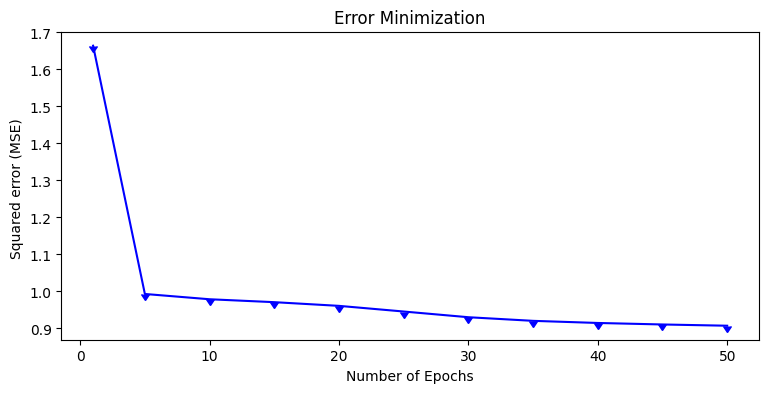

In [ ]:
MLP1.fit(X_train, Y_train)

In [ ]:
Y_pred1 = MLP1.predict(X_test)

In [ ]:
print("Accuracy with Tanh Activation Function is :", end = '')
print("%.3f" % (accuracy_score(Y_pred1, Y_test)*100), '%', sep = '')

Accuracy with Tanh Activation Function is :20.883%


**Using Relu Function**

In [ ]:
params2 = {'InputLayer':8, 'HiddenLayer':5, 'OutputLayer':29,
              'Epocas':50, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'Relu', 'hidden_wight': [[2  * random.random() - 1 for i in range(5)] for j in range(8)], 
              'output_wight':[[2  * random.random() - 1 for i in range(29)] for j in range(5)]}

MLP2 = MultiLayerPerceptron(params2)

Epoch  1 -> Total Error:  1.0523390228386038
Epoch  5 -> Total Error:  0.9538100103573603
Epoch  10 -> Total Error:  0.9481007639597826
Epoch  15 -> Total Error:  0.9423948247586752
Epoch  20 -> Total Error:  0.9396411350997158
Epoch  25 -> Total Error:  0.9385416815649802
Epoch  30 -> Total Error:  0.9380134946045602
Epoch  35 -> Total Error:  0.9375868159709658
Epoch  40 -> Total Error:  0.9372490029665448
Epoch  45 -> Total Error:  0.9369105181709505
Epoch  50 -> Total Error:  0.9366348705294066


<ipython-input-228-f9ae77606c4f>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


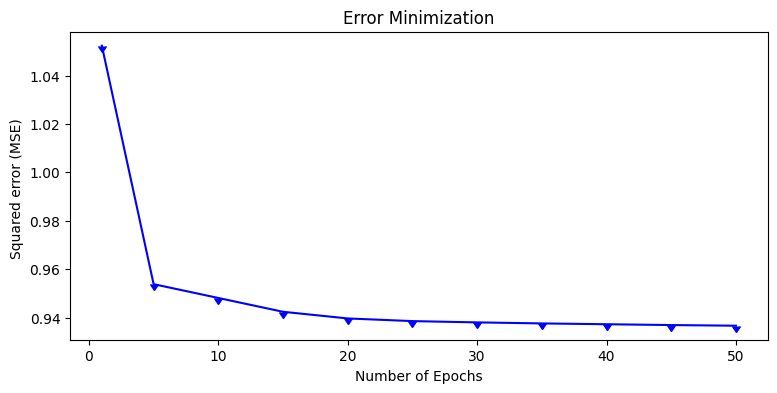

In [ ]:
MLP2.fit(X_train, Y_train)

In [ ]:
Y_pred2 = MLP2.predict(X_test)

In [ ]:
print("Accuracy with Relu Activation Function is :", end = '')
print("%.3f" % (accuracy_score(Y_pred2, Y_test)*100), '%', sep = '')

Accuracy with Relu Activation Function is :11.695%


**Using Sigmoid Function**

In [338]:
params3 = {'InputLayer':8, 'HiddenLayer':5, 'OutputLayer':29,
              'Epocas':50, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid', 'hidden_wight': [[2  * random.random() - 1 for i in range(5)] for j in range(8)], 
              'output_wight':[[2  * random.random() - 1 for i in range(29)] for j in range(5)] }

MLP3 = MultiLayerPerceptron(params3)

Epoch  1 -> Total Error:  3.2199955592929648
Epoch  5 -> Total Error:  1.022249573265286
Epoch  10 -> Total Error:  0.9289808530910031
Epoch  15 -> Total Error:  0.9021312396708309
Epoch  20 -> Total Error:  0.8880560045767913
Epoch  25 -> Total Error:  0.8796274018585676
Epoch  30 -> Total Error:  0.8743336157460826
Epoch  35 -> Total Error:  0.8707868866193365
Epoch  40 -> Total Error:  0.8682412759503492
Epoch  45 -> Total Error:  0.8663043565307081
Epoch  50 -> Total Error:  0.8647608934597925


<ipython-input-294-1e7df31fdca0>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


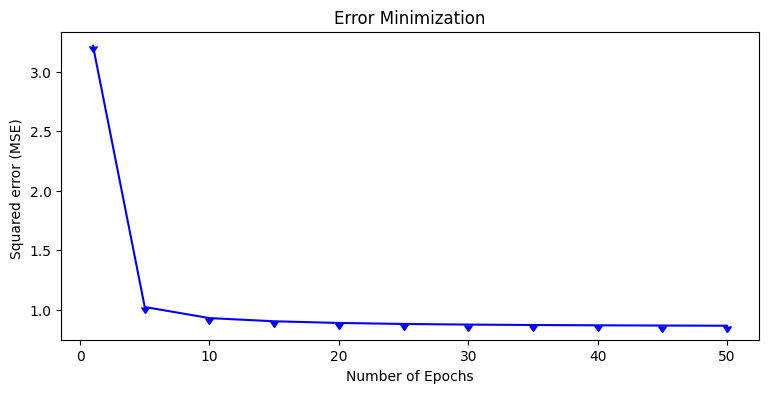

In [339]:
MLP3.fit(X_train, Y_train)

In [340]:
Y_pred3 = MLP3.predict(X_test)

In [341]:
print("Accuracy with Sigmoid Activation Function is :", end = '')
print("%.3f" % (accuracy_score(Y_pred3, Y_test)*100), '%', sep = '')

Accuracy with Sigmoid Activation Function is :11.098%


**Using Different Zero Weight Initialization**

In [ ]:
params4 = {'InputLayer':8, 'HiddenLayer':5, 'OutputLayer':29,
              'Epocas':50, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'tanh', 'hidden_wight': np.zeros((8, 5)), 
              'output_wight':np.zeros((5, 29)) }

MLP4 = MultiLayerPerceptron(params4)

Epoch  1 -> Total Error:  0.9872963620647252
Epoch  5 -> Total Error:  0.965413784122676
Epoch  10 -> Total Error:  0.9662480286048958
Epoch  15 -> Total Error:  0.9671164245251775
Epoch  20 -> Total Error:  0.9677201164161422
Epoch  25 -> Total Error:  0.968115588501865
Epoch  30 -> Total Error:  0.9683680840395518
Epoch  35 -> Total Error:  0.968521851128603
Epoch  40 -> Total Error:  0.9686057989589433
Epoch  45 -> Total Error:  0.9686393899863528
Epoch  50 -> Total Error:  0.9686363030826309


<ipython-input-294-1e7df31fdca0>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


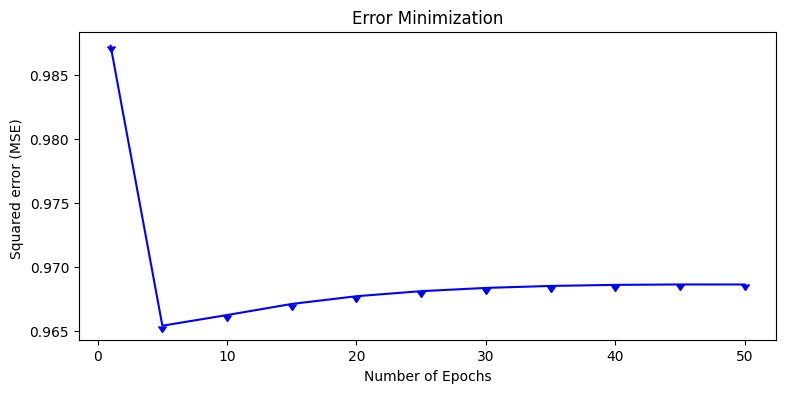

In [ ]:
MLP4.fit(X_train, Y_train)

In [ ]:
Y_pred4 = MLP4.predict(X_test)

In [ ]:
print("Accuracy with Zero wieght Initialization and Tanh Function is :", end = '')
print("%.3f" % (accuracy_score(Y_pred4, Y_test)*100), '%', sep = '')

Accuracy with Zero wieght Initialization and Tanh Function is :16.587%


**Using Constant Weight Initialization**

In [ ]:
params5 = {'InputLayer':8, 'HiddenLayer':5, 'OutputLayer':29,
              'Epocas':50, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'tanh', 'hidden_wight': np.zeros((8, 5))+0.125, 
              'output_wight':np.zeros((5, 29)) + 0.20}

MLP5 = MultiLayerPerceptron(params5)

Epoch  1 -> Total Error:  1.0486669735281728
Epoch  5 -> Total Error:  1.001290672594173
Epoch  10 -> Total Error:  0.9671129157665785
Epoch  15 -> Total Error:  0.9636628736878649
Epoch  20 -> Total Error:  0.9563711341163346
Epoch  25 -> Total Error:  0.9433458215732743
Epoch  30 -> Total Error:  0.9323029694593844
Epoch  35 -> Total Error:  0.9236894923361512
Epoch  40 -> Total Error:  0.919999018396736
Epoch  45 -> Total Error:  0.9194377409045109
Epoch  50 -> Total Error:  0.9188744965397393


<ipython-input-294-1e7df31fdca0>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


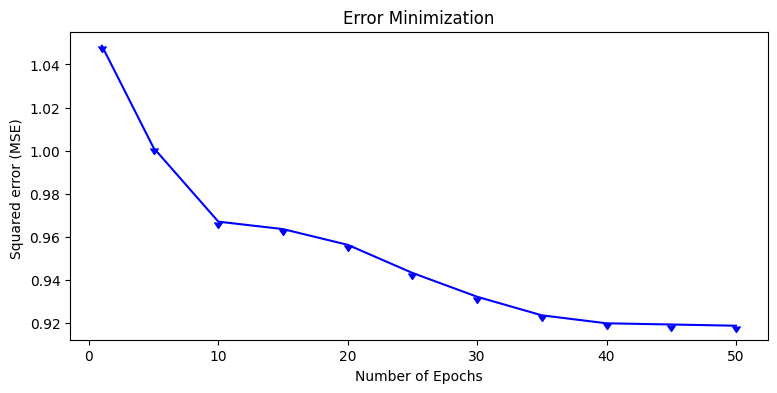

In [ ]:
MLP5.fit(X_train, Y_train)

In [ ]:
Y_pred5 = MLP5.predict(X_test)

In [342]:
print("Accuracy with Constant wieght Initialization and Tanh Function is :", end = '')
print("%.3f" % (accuracy_score(Y_pred5, Y_test)*100), '%', sep = '')

Accuracy with Constant wieght Initialization and Tanh Function is :19.690%


**Using Different Hidden Layers**

Fitting Model for 10 Hidden Nodes
Epoch  1 -> Total Error:  2.1658096620996767
Epoch  5 -> Total Error:  0.9620617783032429
Epoch  10 -> Total Error:  0.9417808337377296
Epoch  15 -> Total Error:  0.9339816294841156


<ipython-input-294-1e7df31fdca0>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


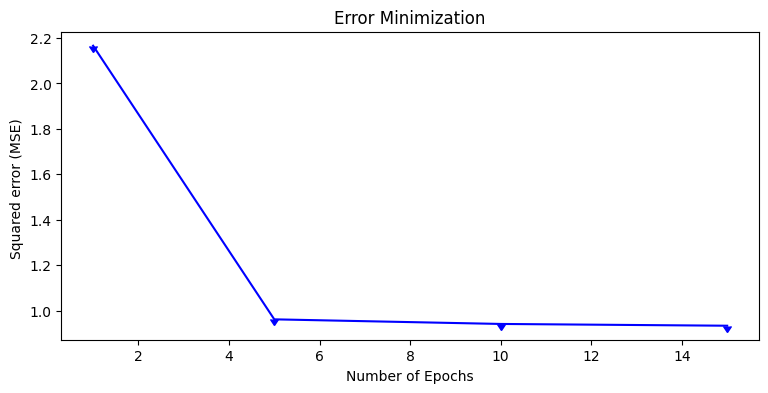

Fitting Model for 15 Hidden Nodes
Epoch  1 -> Total Error:  3.162959780568219
Epoch  5 -> Total Error:  0.9615076677479988
Epoch  10 -> Total Error:  0.9448611964709029
Epoch  15 -> Total Error:  0.9387446256347352


<ipython-input-294-1e7df31fdca0>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


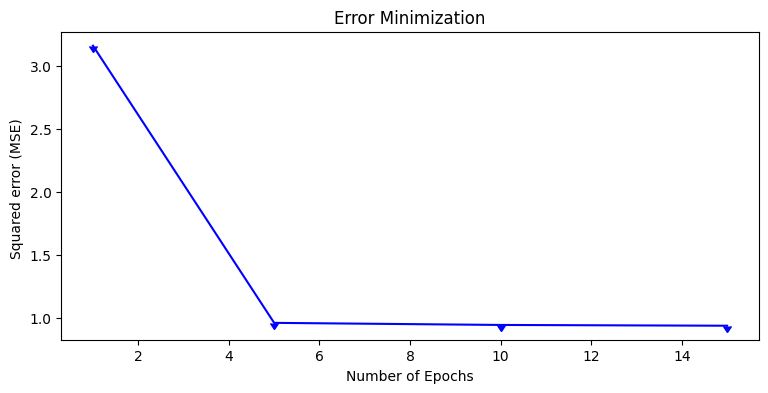

Fitting Model for 20 Hidden Nodes
Epoch  1 -> Total Error:  2.886418780500478
Epoch  5 -> Total Error:  0.9803371883308619
Epoch  10 -> Total Error:  0.9609959477935957
Epoch  15 -> Total Error:  0.9560063003356603


<ipython-input-294-1e7df31fdca0>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


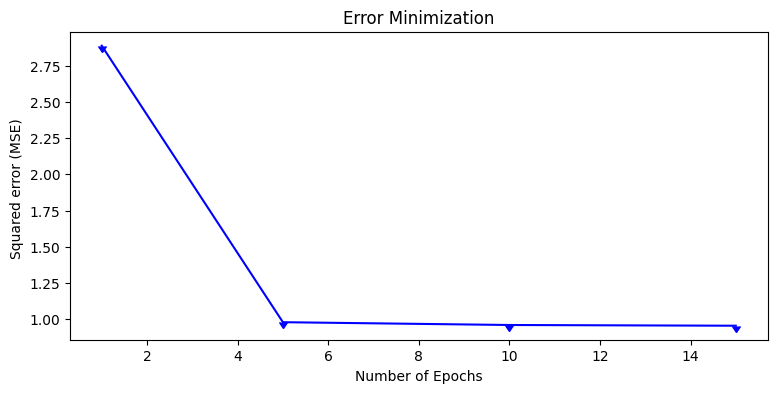

Fitting Model for 25 Hidden Nodes
Epoch  1 -> Total Error:  3.500248642538381
Epoch  5 -> Total Error:  0.9950579454334643
Epoch  10 -> Total Error:  0.9743002413468581
Epoch  15 -> Total Error:  0.9690451641181339


<ipython-input-294-1e7df31fdca0>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


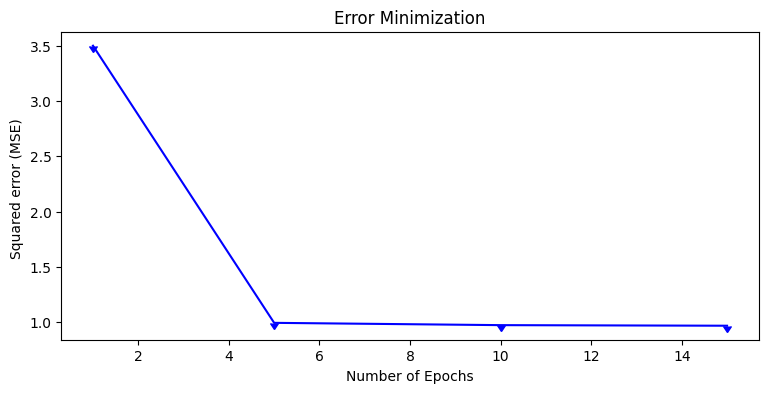

In [ ]:
hidden_nodes = [10, 15, 20, 25]
accuracies = []

for h_n in hidden_nodes:
    print("Fitting Model for {} Hidden Nodes".format(h_n))
    params_new = {'InputLayer':8, 'HiddenLayer':h_n, 'OutputLayer':29,
              'Epocas':15, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'tanh', 'hidden_wight':[[2  * random.random() - 1 for i in range(h_n)] for j in range(8)], 
              'output_wight':[[2  * random.random() - 1 for i in range(29)] for j in range(h_n)]}

    new_MLP = MultiLayerPerceptron(params_new)

    new_MLP.fit(X_train, Y_train)
    Y_pred_new = new_MLP.predict(X_test)

    accuracies.append(accuracy_score(Y_pred_new, Y_test))



In [ ]:
for i in range(len(accuracies)):
    print("Accuracies with {} Hidden Nodes : {}".format(hidden_nodes[i], accuracies[i]))

Accuracies with 10 Hidden Nodes : 0.15990453460620524
Accuracies with 15 Hidden Nodes : 0.1515513126491647
Accuracies with 20 Hidden Nodes : 0.13961813842482101
Accuracies with 25 Hidden Nodes : 0.11933174224343675


Text(0.5, 1.0, 'Hidden Nodes v/s Accuracy')

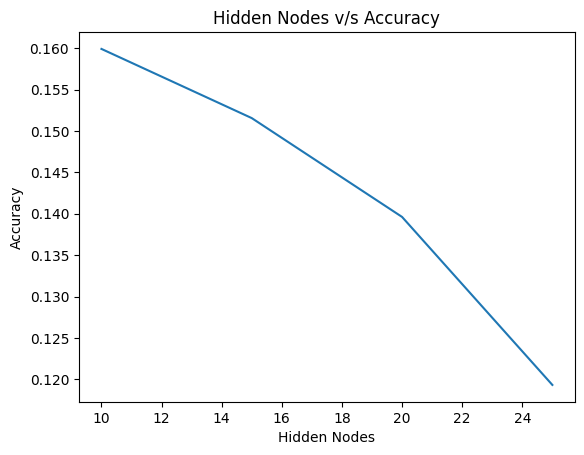

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hidden_nodes, accuracies)
plt.xlabel('Hidden Nodes')
plt.ylabel('Accuracy')
plt.title("Hidden Nodes v/s Accuracy")

So, in general here, Accuracy decreases with increase in number if Hidden Nodes